In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = "Tetuan City power consumption.csv"
df = pd.read_csv(file_path)

# Select relevant features and target variable
features = ["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]
target = "Zone 1 Power Consumption"

df = df.iloc[:2016] 

# Normalize the data to prevent numerical instability
df[features] = (df[features] - df[features].mean()) / df[features].std()
df[target] = (df[target] - df[target].mean()) / df[target].std()

# Split data into initial batch (first week) and new batch (second week)
X_init = df[features].iloc[:1008].values  # Initial independent variables
Y_init = df[target].iloc[:1008].values.reshape(-1, 1)  # Initial dependent variable

X_new = df[features].iloc[1008:].values  # New independent variables
Y_new = df[target].iloc[1008:].values.reshape(-1, 1)  # New dependent variable

# Add intercept term
X_init = np.hstack((np.ones((X_init.shape[0], 1)), X_init))
X_new = np.hstack((np.ones((X_new.shape[0], 1)), X_new))

In [5]:
# ---- Step G1: Initialize OLS estimator ----
V_n = np.linalg.inv(X_init.T @ X_init)  # Compute initial V(n) = (X(n)^T X(n))^{-1}
beta_n = V_n @ X_init.T @ Y_init  # Compute initial beta(n) = V(n) X(n)^T Y(n)

# Store temperature coefficient updates
temperature_coeffs = [beta_n[1, 0]]


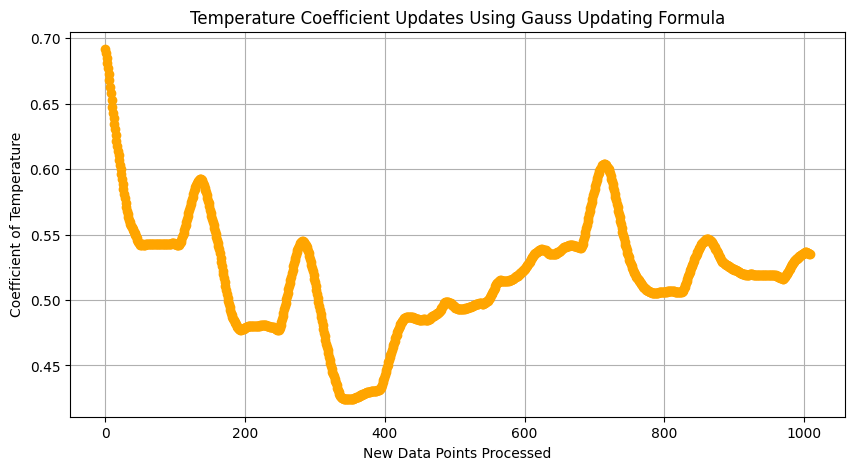

In [ ]:
for i in range(X_new.shape[0]):
    x_n1 = X_new[i].reshape(-1, 1)
    y_n1 = Y_new[i]

    # G2: Update V(n+1)
    gamma_n1 = V_n @ x_n1 / (1 + x_n1.T @ V_n @ x_n1)
    
    # G3: Compute residual
    e_hat_n1 = y_n1 - x_n1.T @ beta_n 
    
    # G4: Update beta(n+1)
    beta_n = beta_n + gamma_n1 * e_hat_n1 
    # Update V(n+1)
    V_n = V_n - gamma_n1 @ x_n1.T @ V_n
    
    # Store updated temperature coefficient
    temperature_coeffs.append(beta_n[1, 0])

plt.figure(figsize=(10, 5))
plt.plot(range(len(temperature_coeffs)), temperature_coeffs, marker='o', linestyle='-', color='orange', linewidth=2)
plt.xlabel("New Data Points Processed")
plt.ylabel("Coefficient of Temperature")
plt.title("Temperature Coefficient Updates Using Gauss Updating Formula")
plt.grid(True)
plt.show()